In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
master = pd.read_csv("../logs/traceUsage/report.txt")

In [3]:
master

,time,code-section,gpu-utilization,memory-utilization,PCIE-throughput,power-usage,energy-usage,temperature
0,0.023495,"Init: load model, bb setup, data_loader, etc",4,0,1002000,35807,11049,37
1,1.347266,"Init: load model, bb setup, data_loader, etc",7,0,1007000,35807,58571,37
2,1.550816,"Init: load model, bb setup, data_loader, etc",6,0,1001000,36098,65934,37
3,1.754231,"Init: load model, bb setup, data_loader, etc",6,0,1001000,36109,73258,37
4,1.957625,"Init: load model, bb setup, data_loader, etc",6,0,1001000,36099,80589,37
5,2.160819,"Init: load model, bb setup, data_loader, etc",6,0,1001000,38347,88081,37
6,2.369191,"Init: load model, bb setup, data_loader, etc",9,1,1001000,36779,95759,37
7,2.572491,"Init: load model, bb setup, data_loader, etc",5,0,1001000,36001,103080,37
8,2.775793,"Init: load model, bb setup, data_loader, etc",6,0,1001000,36098,110409,37
9,2.979057,"Init: load model, bb setup, data_loader, etc",7,0,1001000,36293,117733,37


In [4]:
ranges = []
colors = "bgrcmykw"
c_i=0
for cs in master['code-section'].unique():
    c_i=c_i+1
    ranges.append([cs,master['time'].loc[master['code-section'] == cs].min(),master['time'].loc[master['code-section'] == cs].max(),colors[c_i]])

In [5]:
gpu_util = master[['time','gpu-utilization']]
mem_util = master[['time','memory-utilization']]

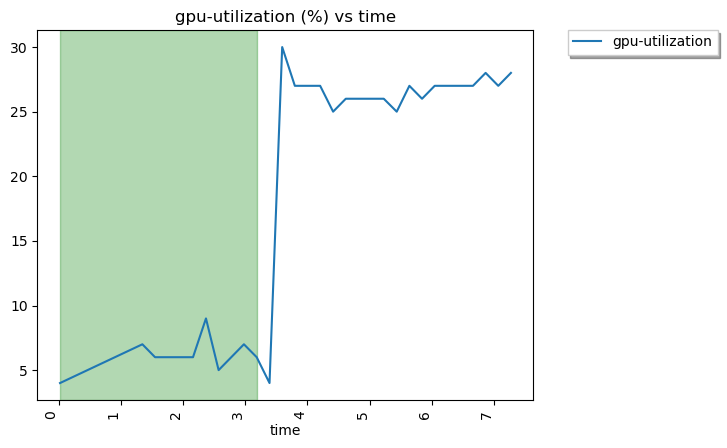

In [6]:
ax = gpu_util.plot(markevery=gpu_util[['gpu-utilization']],x='time', title='gpu-utilization (%) vs time')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right');
ax.legend(loc='upper center', bbox_to_anchor=(1.22, 1.02), ncol=1, fancybox=False, shadow=True)
ax.axvspan(ranges[0][1], ranges[0][2], color=ranges[0][3], alpha=0.3)

fig = ax.get_figure()
fig.savefig('figures/gpu_util_trace.jpg',bbox_inches='tight')
fig = ax.get_figure()

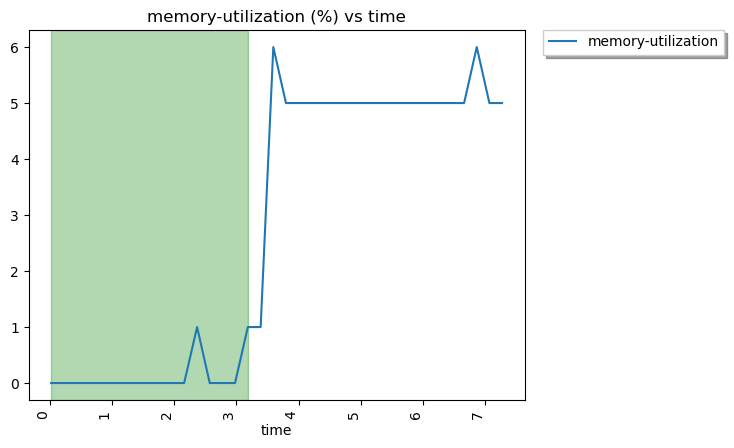

In [8]:
ax2 = mem_util.plot(x='time', title='memory-utilization (%) vs time')
plt.setp(ax2.get_xticklabels(), rotation=90, horizontalalignment='right');
ax2.legend(loc='upper center', bbox_to_anchor=(1.22, 1.02), ncol=1, fancybox=False, shadow=True)
ax2.axvspan(ranges[0][1], ranges[0][2], color=ranges[0][3], alpha=0.3)

fig = ax2.get_figure()
fig.savefig('figures/mem_util_trace.jpg',bbox_inches='tight')
fig = ax2.get_figure()